# King County House Sales analysis

## 1.0 Business Understanding

The real estate market in the USA has experienced fluctuations over the years. Generally, house prices have shown an upward trend, with periods of growth followed by occasional declines. The key factors that have been driving recent price movements include supply and demand dynamics, economic conditions, interest rates, demographic changes, and location-specific factors.

Supply and demand play a crucial role in shaping house prices. Limited housing inventory relative to demand can lead to price appreciation, while an oversupply can result in price declines. Economic conditions, such as job growth, income levels, and consumer confidence, also impact housing demand and, subsequently, prices.

Demographic changes, such as population growth, migration patterns, and generational preferences, can affect housing demand in specific regions. Moreover, location-specific factors, including proximity to amenities, schools, transportation, and economic hubs, contribute to price differentials across neighborhoods and cities.

Understanding these various factors and their influence on house prices is essential for building accurate regression models that predict housing prices effectively.

## 1.1 Problem Statement

A real estate company wishes to use the King County House Sales dataset to optimise the sale prices of the properties based on important factors that are strongly associated with driving house prices.

The company wants to:

* Identify the variables affecting house prices

* Create a linear model that quantitatively relates house prices with variables 

* Know the accuracy of the model, i.e. how well these variables can predict house prices

## 1.2 Project Objectives

1. Perform exhaustive and accurate data cleaning
2. Explore different categorical handling methods
3. Build a model that accurately predicts house prices in King County

## 1.3 Context Real Estate prices in the county or state


## 2.0 Data Overview

This dataset contains house sale prices for King County in the USA. It includes homes sold between May 2014 and May 2015.
The raw dataset have 21597 rows and 21 columns. 
By observing the data, we can know that the price is dependent on various features like bedrooms, bathrooms, sqft_living, sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. We do have missing values which will be addressed during exploratroy data analysis.

From our research the columns are further described below:

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

## 3.0 Data Analysis Approach

The data analysis phase will involve the following steps:

1. Loading the data to pandas and analyzing the dataframes
2. Cleaning the data by checking & handling:
   * Duplicates
   * Missing data
   * Anomalies
   * Invalid data
   * Other additional data cleaning procedures as needed
3. Performing exploratory anaysis
4. Linear Regression Modelling
5. Drawing conclusions
6. Making recommendations

## 4.0 Loading the Data 

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above   
0      5650     1.0        NaN  NONE  ...      7 Average       1180  \
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long   
0            0.0     1955           0.0    98178  47.5112 -122.257  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### 4.1 Data Inspection

In [3]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#finding unique entries in each column & trying to identify anomalies in the entries
unique_entries = {}
for column in data.columns:
    unique_entries[column] = data[column].unique()

print(unique_entries)

{'id': array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157], dtype=int64), 'date': array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/201

### 4.2 Data Cleaning

In [5]:
#check duplicates
data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [6]:
#check for nulls 
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#exploring columns with nulls
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

Given majority of entries have entry 'NO' - we will make assumption and replace nan with 'NO'

In [9]:
data['waterfront'].fillna('NO', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [12]:
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

From the above cell we see that 'NONE' is the predominant entry value in the view column, hence we will replace nan with 'NONE'

In [13]:
data['view'].fillna('NONE', inplace=True)

In [14]:
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

17011 rows have year entry as 0.0.. hence alot of houses have not been renovated. We wont drop this column, for the nan values we will assume they've not been renovated hence replace with 0.

In [16]:
# Replacing nans in yr_renovated

data['yr_renovated'].fillna('0.', inplace=True)

In [17]:
#recheck for nulls 
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
#Bedrooms values
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [20]:
#Bathroom values
data['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [21]:
#Handle non numeric data in sqft_basement column
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [22]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
#Replace rows with '?' with median value of 'sqft_basement' column

column_name = 'sqft_basement'
placeholder = '?' 

# Convert the column to numeric, excluding rows with the placeholder value
numeric_values = pd.to_numeric(data['sqft_basement'], errors='coerce')
filtered_values = numeric_values[numeric_values.notna()]

# median value for the filtered column
median_value = np.median(filtered_values)

# Replace the object values with the median value
data['sqft_basement'] = np.where(data['sqft_basement'] == placeholder, median_value, data['sqft_basement'])

In [25]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [27]:
# Convert dtype for 'sqft_basement' column from object to float64 to enable calculations
data.sqft_basement = data.sqft_basement.astype(float)

In [28]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [30]:
#reviewing unique values for categorical variables

columns = ['waterfront', 'view', 'condition', 'grade']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'waterfront':
['NO' 'YES']

Unique values for column 'view':
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Unique values for column 'condition':
['Average' 'Very Good' 'Good' 'Poor' 'Fair']

Unique values for column 'grade':
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']



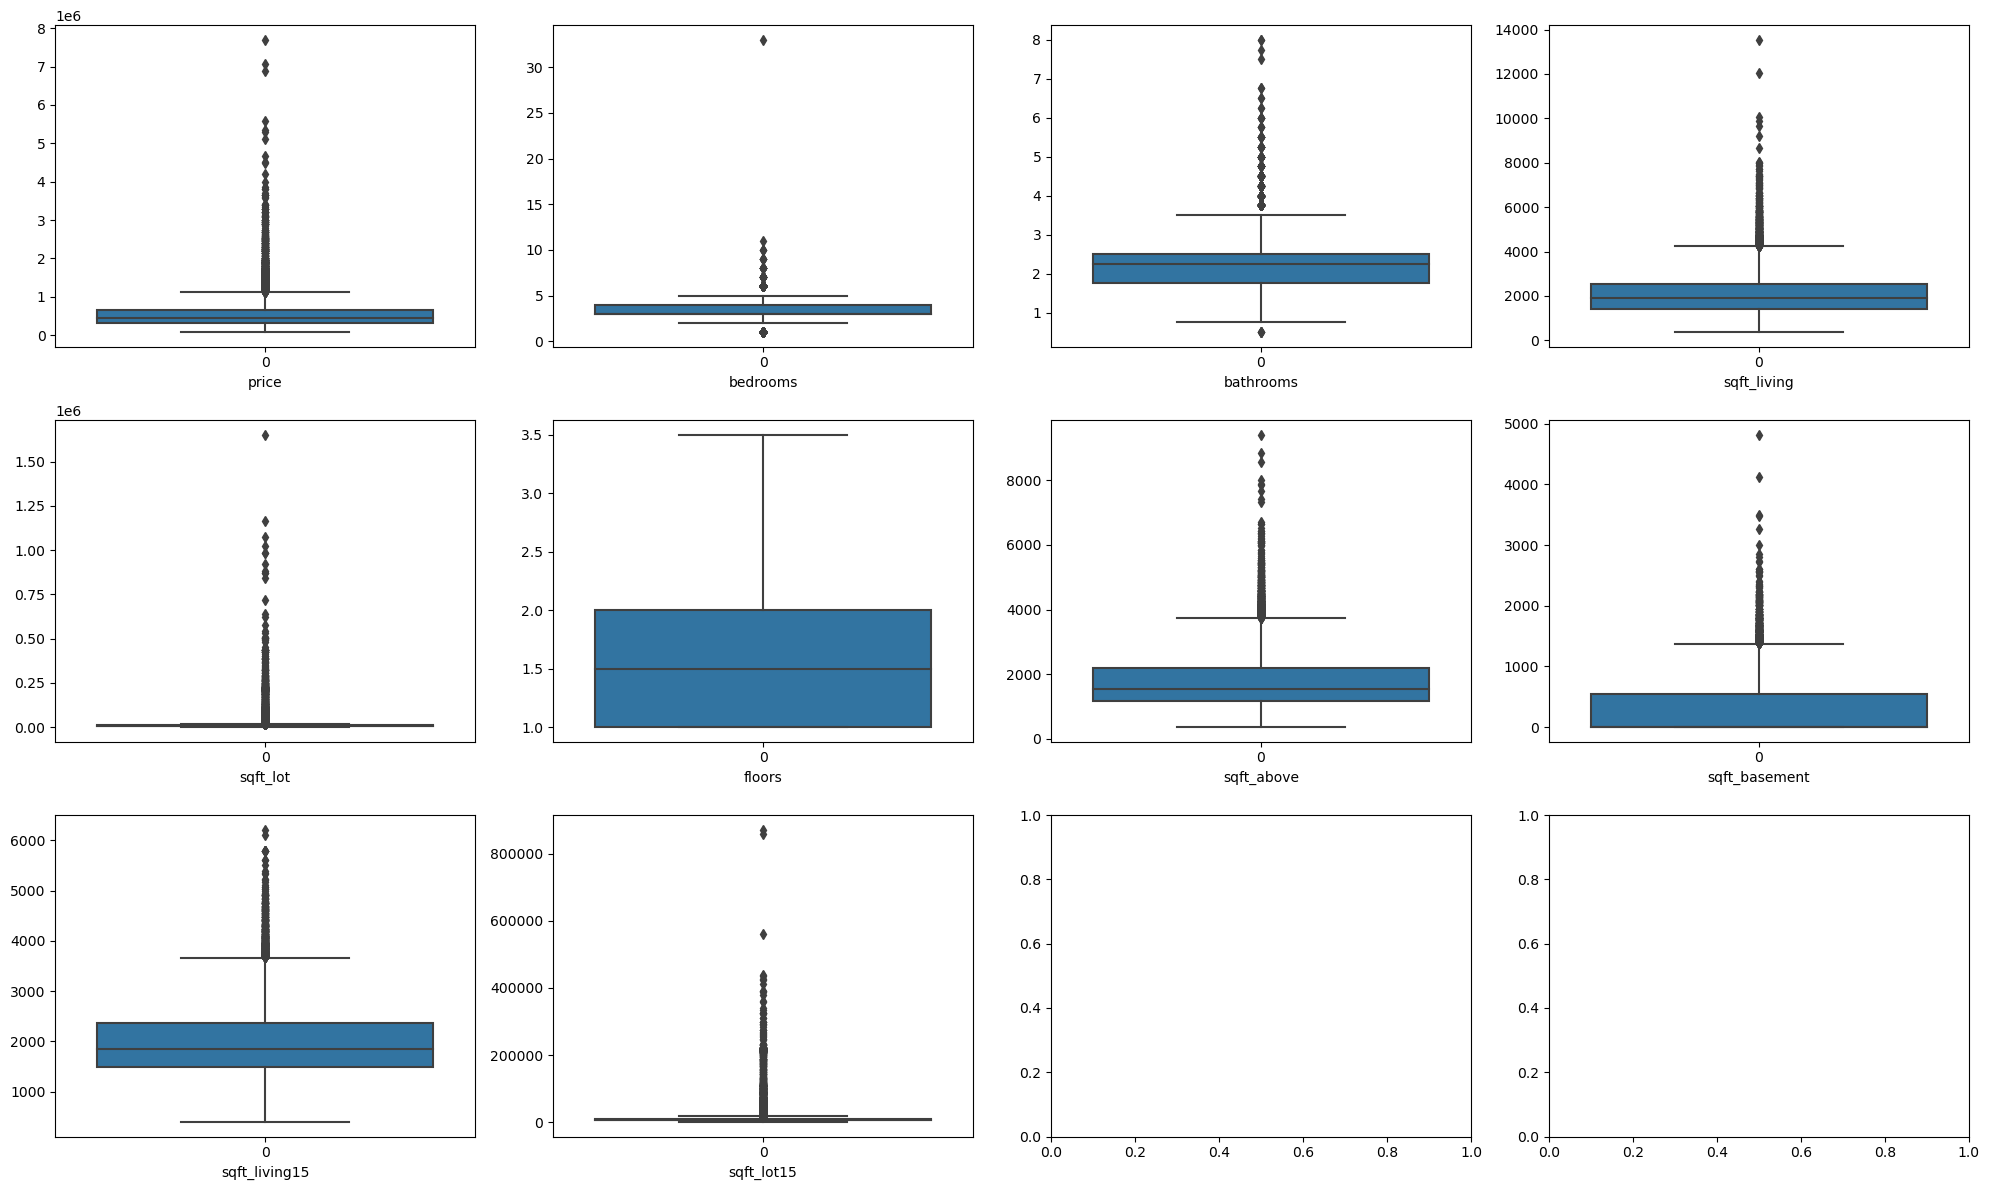

In [31]:
# Outlier Analysis for numeric variables
fig, axs = plt.subplots(3, 4, figsize=(20,12))

# Column names
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
           'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Iterate over the columns and create the box plots
for i, column in enumerate(columns):
    sns.boxplot(data[column], ax=axs[i // 4, i % 4])
    axs[i // 4, i % 4].set_xlabel(column)  

plt.tight_layout()

plt.show()

Observation - all numeric variables except floors have alot of outliers.Given this is real data, I want to avoid removing outliers indiscriminately. Hence i choose to remove based on IQR for sqft_living and sqft_lot variables. Bedrooms have one entry with 33 bedrooms. We hope to remove this entry via IQR. If doesnt work, we will drop the record separately.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  object 
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [33]:
# Handle outliers in numeric columns
columns_outlier = ['sqft_living', 'sqft_lot']

# Function to handle outliers
def handle_outliers(column):
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert column to numeric
    q1 = np.percentile(data[column].dropna(), 25)  # 1st quartile
    q3 = np.percentile(data[column].dropna(), 75)  # 3rd quartile
    iqr = q3 - q1  # Interquartile range

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Exclude values outside the lower and upper bounds
    data[column] = np.where((data[column] >= lower_bound) & (data[column] <= upper_bound),
                            data[column], np.nan)

# Iterate over the columns and handle outliers
for column in columns_outlier:
    handle_outliers(column)

# Drop rows with outliers across all columns
data.dropna(inplace=True)

# Reset the index 
data.reset_index(drop=True, inplace=True)

In [34]:
#dataframe post handling outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18861 entries, 0 to 18860
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18861 non-null  int64  
 1   date           18861 non-null  object 
 2   price          18861 non-null  float64
 3   bedrooms       18861 non-null  int64  
 4   bathrooms      18861 non-null  float64
 5   sqft_living    18861 non-null  float64
 6   sqft_lot       18861 non-null  float64
 7   floors         18861 non-null  float64
 8   waterfront     18861 non-null  object 
 9   view           18861 non-null  object 
 10  condition      18861 non-null  object 
 11  grade          18861 non-null  object 
 12  sqft_above     18861 non-null  int64  
 13  sqft_basement  18861 non-null  float64
 14  yr_built       18861 non-null  int64  
 15  yr_renovated   18861 non-null  object 
 16  zipcode        18861 non-null  int64  
 17  lat            18861 non-null  float64
 18  long  

In [35]:
data['bedrooms'].value_counts()

bedrooms
3     8812
4     5806
2     2573
5     1253
6      204
1      173
7       23
8        8
9        5
10       2
11       1
33       1
Name: count, dtype: int64

In [36]:
# Separately drop the entry with 33 bedrooms to reduce the skewness of this column
data = data.drop(data[data['bedrooms'] == 33].index)

In [37]:
# Decision to drop entry with 11 bedrooms to reduce the skewness of this column
data = data.drop(data[data['bedrooms'] == 11].index)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18859 entries, 0 to 18860
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18859 non-null  int64  
 1   date           18859 non-null  object 
 2   price          18859 non-null  float64
 3   bedrooms       18859 non-null  int64  
 4   bathrooms      18859 non-null  float64
 5   sqft_living    18859 non-null  float64
 6   sqft_lot       18859 non-null  float64
 7   floors         18859 non-null  float64
 8   waterfront     18859 non-null  object 
 9   view           18859 non-null  object 
 10  condition      18859 non-null  object 
 11  grade          18859 non-null  object 
 12  sqft_above     18859 non-null  int64  
 13  sqft_basement  18859 non-null  float64
 14  yr_built       18859 non-null  int64  
 15  yr_renovated   18859 non-null  object 
 16  zipcode        18859 non-null  int64  
 17  lat            18859 non-null  float64
 18  long       

In [39]:
data['bedrooms'].value_counts()

bedrooms
3     8812
4     5806
2     2573
5     1253
6      204
1      173
7       23
8        8
9        5
10       2
Name: count, dtype: int64

In [40]:
data['sqft_basement'].value_counts()

sqft_basement
0.0       11626
500.0       196
700.0       194
600.0       194
800.0       178
          ...  
1940.0        1
1548.0        1
1630.0        1
861.0         1
248.0         1
Name: count, Length: 242, dtype: int64

In [41]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living   
count  1.885900e+04  1.885900e+04  18859.000000  18859.000000  18859.000000  \
mean   4.731922e+09  4.985757e+05      3.327748      2.050692   1944.145077   
std    2.871848e+09  2.747182e+05      0.884075      0.714025    741.912017   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.296600e+09  3.125000e+05      3.000000      1.500000   1380.000000   
50%    4.055701e+09  4.350000e+05      3.000000      2.000000   1830.000000   
75%    7.504011e+09  6.100000e+05      4.000000      2.500000   2400.000000   
max    9.900000e+09  3.100000e+06     10.000000      7.500000   4230.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built   
count  18859.000000  18859.000000  18859.000000   18859.000000  18859.000000  \
mean    7319.121852      1.484013   1673.572777     265.115277   1969.978260   
std     3583.135905      0.544252    693.933817     400.356434     30.054711   
min      520.000000      1.000000    370.000000       0.000000   1900.000000   
25%     4850.000000      1.000000   1160.000000       0.000000   1950.000000   
50%     7200.000000      1.000000   1490.000000       0.000000   1971.000000   
75%     9339.000000      2.000000   2050.000000     510.000000   1997.000000   
max    19141.000000      3.500000   4230.000000    2070.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  18859.000000  18859.000000  18859.000000   18859.000000   18859.000000  
mean   98081.299910     47.562192   -122.228494    1893.147781    7338.491012  
std       54.040487      0.136666      0.132457     604.080633    4416.883406  
min    98001.000000     47.155900   -122.512000     460.000000     651.000000  
25%    98033.000000     47.479200   -122.336000    1450.000000    5000.000000  
50%    98074.000000     47.573600   -122.266000    1770.000000    7210.000000  
75%    98118.000000     47.679050   -122.152000    2230.000000    9000.000000  
max    98199.000000     47.777600   -121.315000    5790.000000  196591.000000

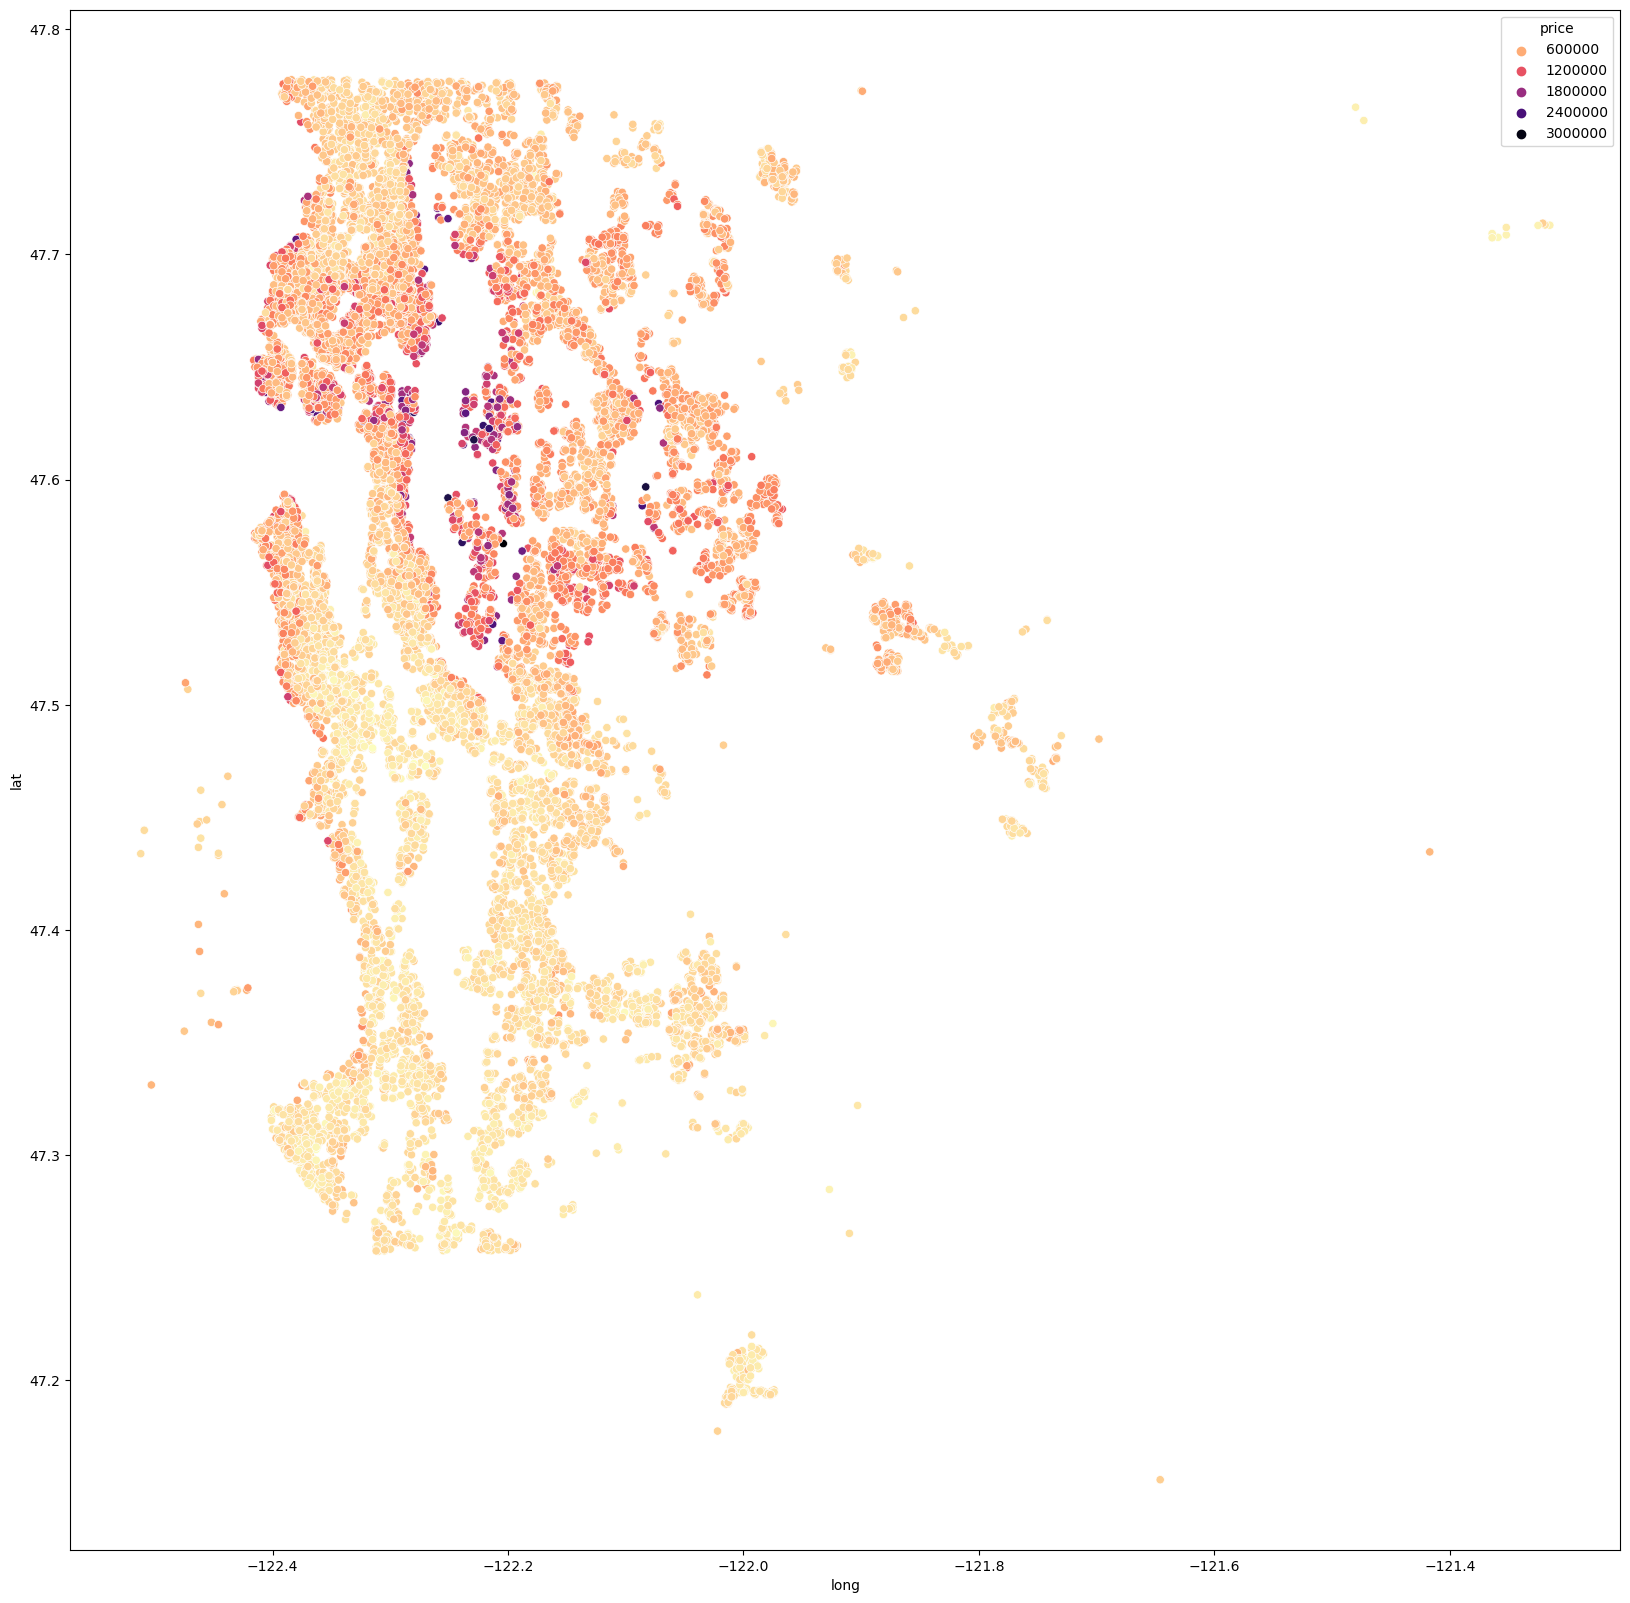

In [42]:
# reviewing latitude and longitude to see if any outliers

plt.figure(figsize=(20,20))

sns.scatterplot(data=data, x="long", y="lat", hue="price", palette="magma_r");

Observed afew outliers on the longitude, hence will drop them to reduce noise in the model.

In [43]:
# drop the houses at extreme longtude as they are few and seem out of place from other houses
data.drop(data[data['long'] > -121.7].index, inplace=True)

# looking for outliers in the percentiles
data.describe()

id         price      bedrooms     bathrooms   sqft_living   
count  1.884500e+04  1.884500e+04  18845.000000  18845.000000  18845.000000  \
mean   4.731421e+09  4.987643e+05      3.328416      2.051061   1944.586734   
std    2.871384e+09  2.747126e+05      0.883840      0.713971    741.899235   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.296500e+09  3.125000e+05      3.000000      1.500000   1380.000000   
50%    4.055701e+09  4.350000e+05      3.000000      2.000000   1830.000000   
75%    7.504010e+09  6.100000e+05      4.000000      2.500000   2400.000000   
max    9.900000e+09  3.100000e+06     10.000000      7.500000   4230.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built   
count  18845.000000  18845.000000  18845.000000   18845.000000  18845.000000  \
mean    7316.942690      1.483948   1673.872327     265.253330   1969.983391   
std     3581.487444      0.544379    694.030508     400.437923     30.049812   
min      520.000000      1.000000    370.000000       0.000000   1900.000000   
25%     4850.000000      1.000000   1160.000000       0.000000   1950.000000   
50%     7200.000000      1.000000   1490.000000       0.000000   1971.000000   
75%     9333.000000      2.000000   2052.000000     510.000000   1997.000000   
max    19141.000000      3.500000   4230.000000    2070.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  18845.000000  18845.000000  18845.000000   18845.000000   18845.000000  
mean   98081.345662     47.562132   -122.229100    1893.614964    7334.824197  
std       54.033695      0.136626      0.130589     603.944830    4412.959213  
min    98001.000000     47.177500   -122.512000     460.000000     651.000000  
25%    98033.000000     47.479200   -122.336000    1450.000000    5000.000000  
50%    98074.000000     47.573500   -122.266000    1770.000000    7210.000000  
75%    98118.000000     47.679000   -122.152000    2230.000000    9000.000000  
max    98199.000000     47.777600   -121.730000    5790.000000  196591.000000

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18845 entries, 0 to 18860
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18845 non-null  int64  
 1   date           18845 non-null  object 
 2   price          18845 non-null  float64
 3   bedrooms       18845 non-null  int64  
 4   bathrooms      18845 non-null  float64
 5   sqft_living    18845 non-null  float64
 6   sqft_lot       18845 non-null  float64
 7   floors         18845 non-null  float64
 8   waterfront     18845 non-null  object 
 9   view           18845 non-null  object 
 10  condition      18845 non-null  object 
 11  grade          18845 non-null  object 
 12  sqft_above     18845 non-null  int64  
 13  sqft_basement  18845 non-null  float64
 14  yr_built       18845 non-null  int64  
 15  yr_renovated   18845 non-null  object 
 16  zipcode        18845 non-null  int64  
 17  lat            18845 non-null  float64
 18  long       

In [45]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 5.0 Exploratory data analysis

EDA will enable understanding the data.

* It will bring out obvious multicollinearity
* It will also help in identify predictors with strong association with the target (price)

In [46]:
#Correlation matrix for numeric variables

numeric_df = data[['price', 'bedrooms','bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above', 'sqft_basement']]
numeric_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above   
0  221900.0         3       1.00       1180.0    5650.0     1.0        1180  \
1  538000.0         3       2.25       2570.0    7242.0     2.0        2170   
2  180000.0         2       1.00        770.0   10000.0     1.0         770   
3  604000.0         4       3.00       1960.0    5000.0     1.0        1050   
4  510000.0         3       2.00       1680.0    8080.0     1.0        1680   

   sqft_basement  
0            0.0  
1          400.0  
2            0.0  
3          910.0  
4            0.0

In [47]:
#Correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()
correlation_matrix 

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors   
price          1.000000  0.282895   0.443030     0.621942  0.061911  0.253928  \
bedrooms       0.282895  1.000000   0.505665     0.616656  0.200876  0.161178   
bathrooms      0.443030  0.505665   1.000000     0.719362  0.000111  0.513314   
sqft_living    0.621942  0.616656   0.719362     1.000000  0.236266  0.345917   
sqft_lot       0.061911  0.200876   0.000111     0.236266  1.000000 -0.332387   
floors         0.253928  0.161178   0.513314     0.345917 -0.332387  1.000000   
sqft_above     0.508767  0.493501   0.639590     0.844723  0.193246  0.539763   
sqft_basement  0.265612  0.277800   0.218867     0.380961  0.101207 -0.288645   

               sqft_above  sqft_basement  
price            0.508767       0.265612  
bedrooms         0.493501       0.277800  
bathrooms        0.639590       0.218867  
sqft_living      0.844723       0.380961  
sqft_lot         0.193246       0.101207  
floors           0.539763      -0.288645  
sqft_above       1.000000      -0.164526  
sqft_basement   -0.164526       1.000000

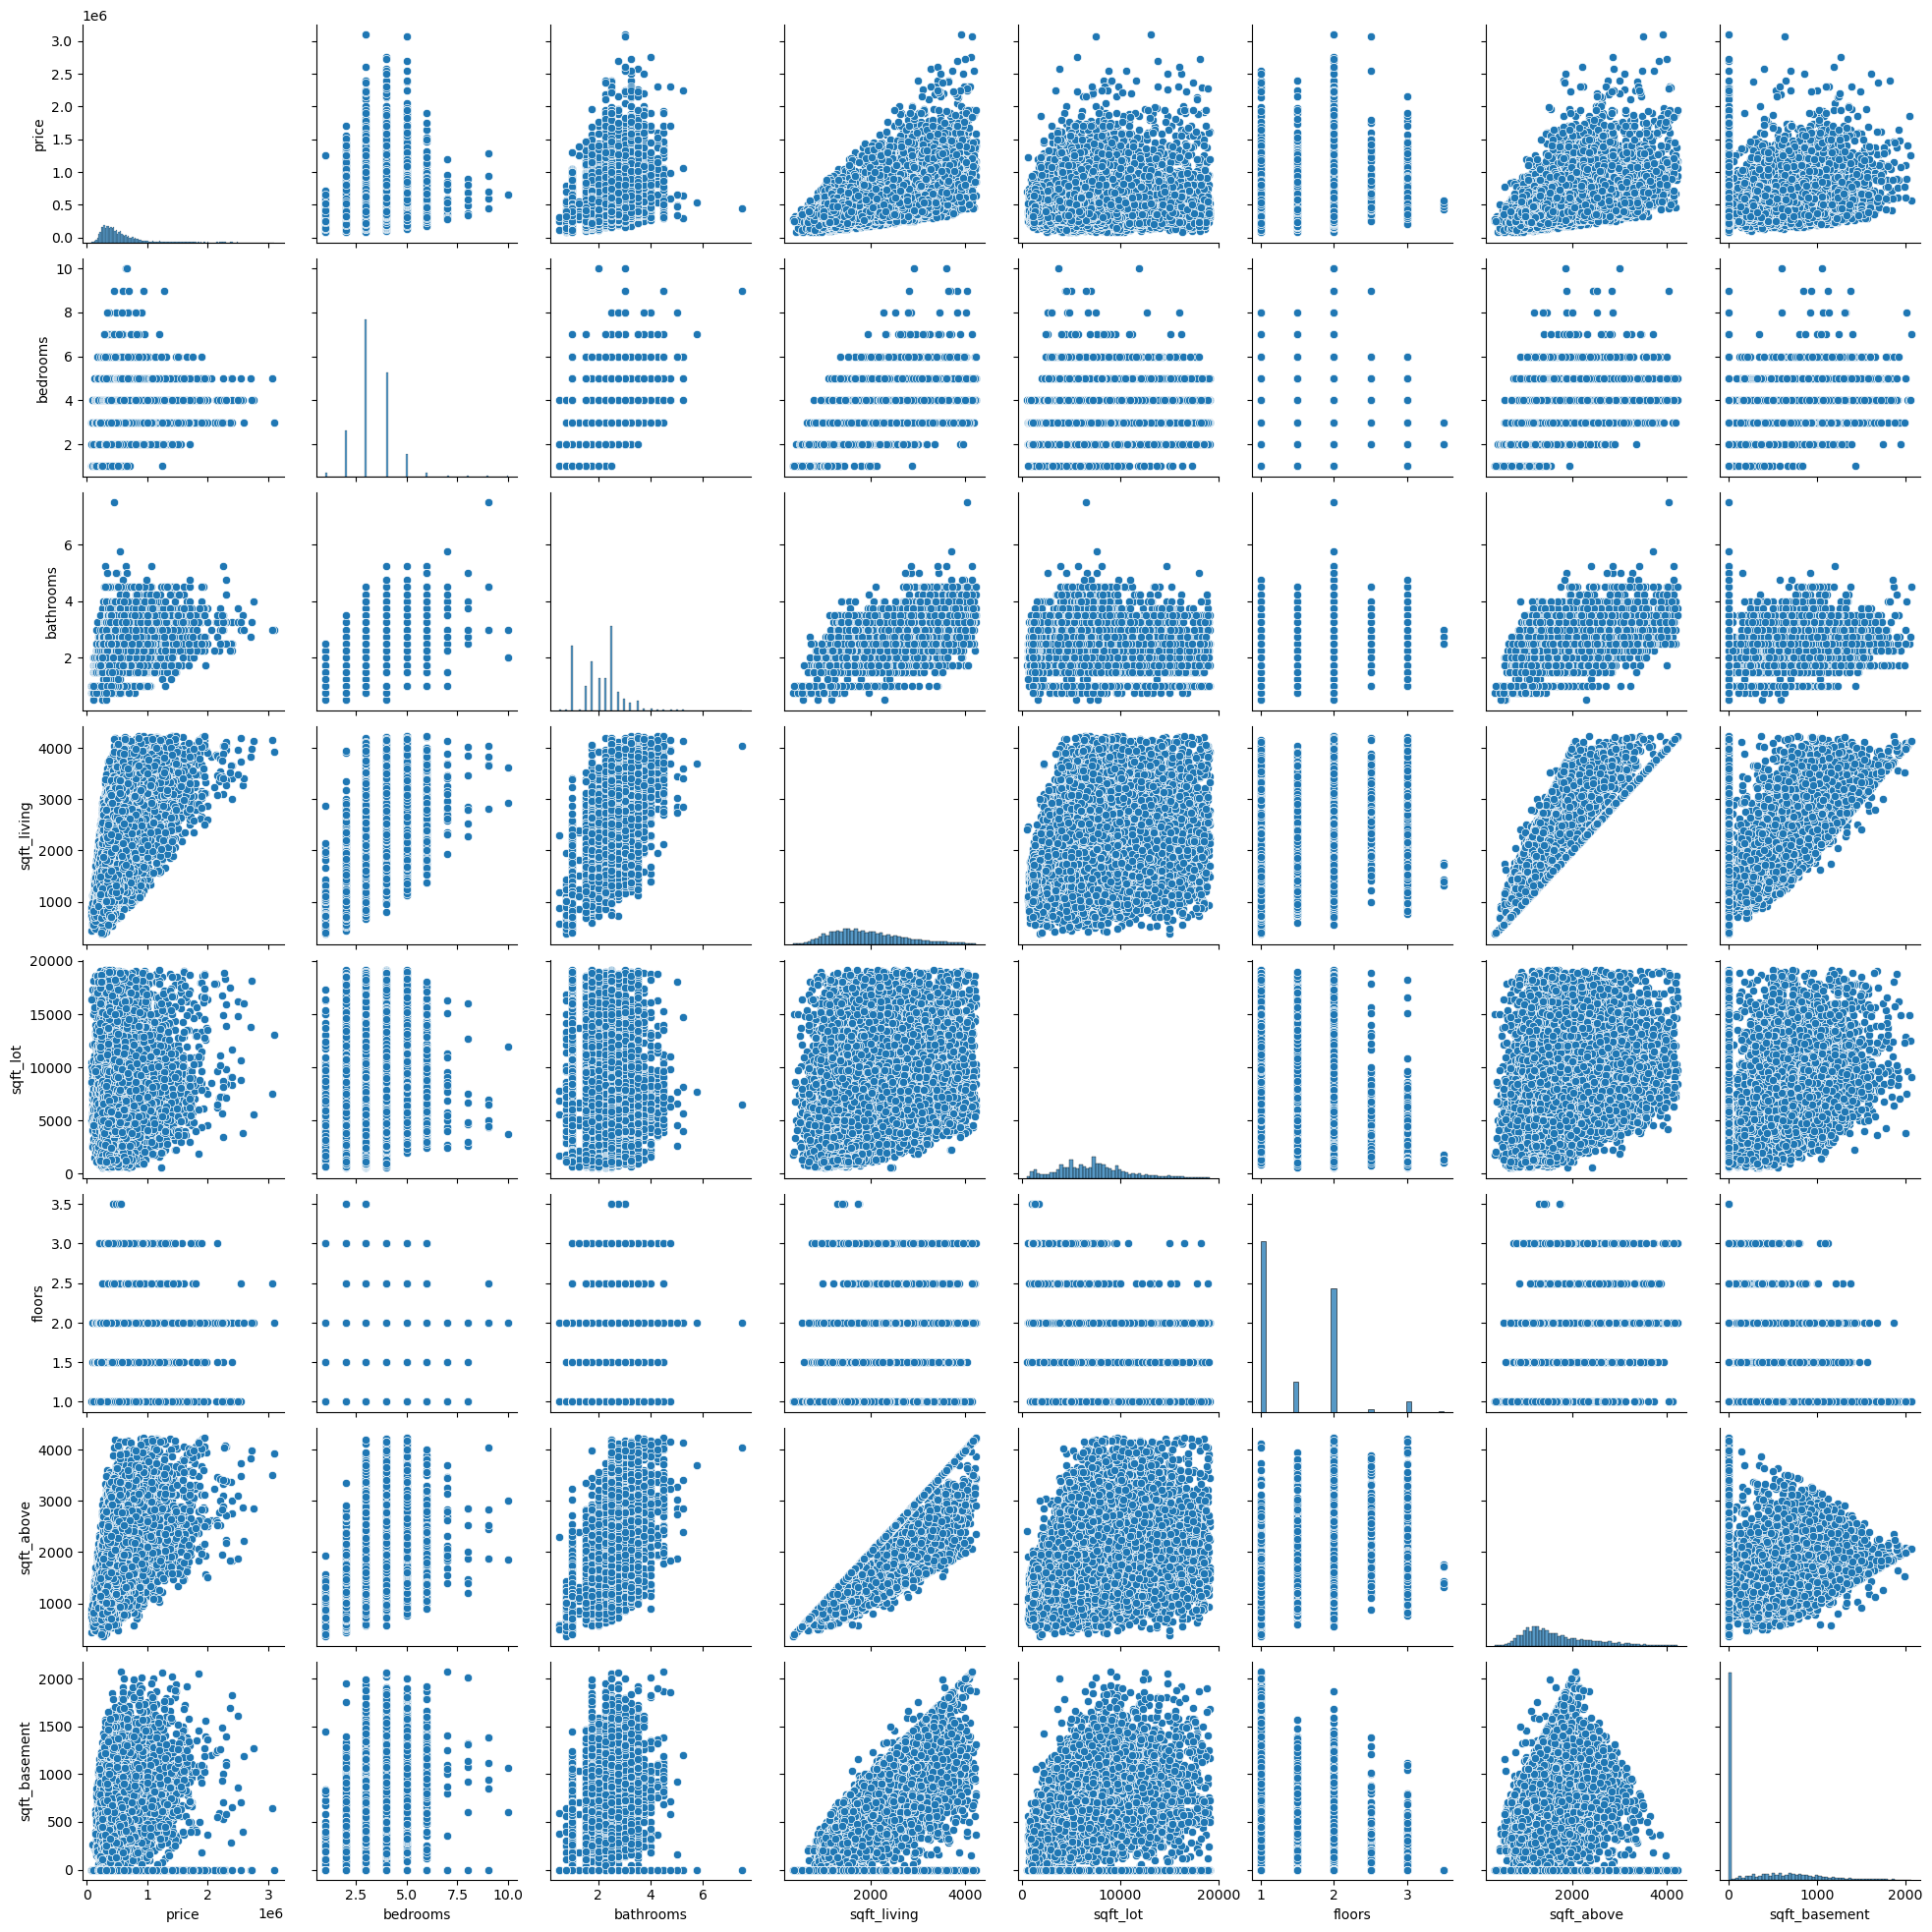

In [48]:
#Correlation matrix for numeric variables - visualization
sns.pairplot(numeric_df)
plt.show()

Observation: The correlation analysis above shows that sqft_living has the highest correlation with price. On the other hand, there is strong collinearity between numeric variables, especially sqft_lving having strong with sqft_above, bathroom and bedroom variables. Hence decision to use sqft_living only as the numeric variable in the model.

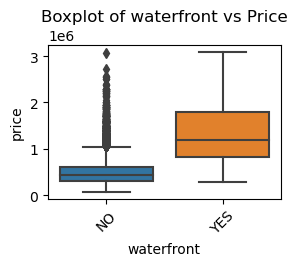

In [49]:
# Plotting 'waterfront' against price

x = data['waterfront']
y = data['price']

plt.figure(figsize=(3, 2))
sns.boxplot(x=x, y=y)
plt.title('Boxplot of waterfront vs Price')
plt.xticks(rotation=45)
plt.show()

Observation: Waterfront 'YES' meaning when a house has a waterfront, increases price of house

In [50]:
# Binary variable encoding

variable =  ['waterfront']

# Defining the map function
def binary_map(x):
    return x.map({'YES': 1, "NO": 0})

# Applying the function to the housing list
data[variable] = data[variable].apply(binary_map)

In [51]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [52]:
data['waterfront'].value_counts()

waterfront
0    18780
1       65
Name: count, dtype: int64

Observation:
* waterfront variable - extremely limited houses have waterfronts i.e. 15 while 14079 do not have. Hence will exclude waterfront as a feature.

In [53]:
#Relationship between target and multi category categorical variables
categorical_vars = data[['view', 'condition', 'grade', 'zipcode']]
y = data['price']

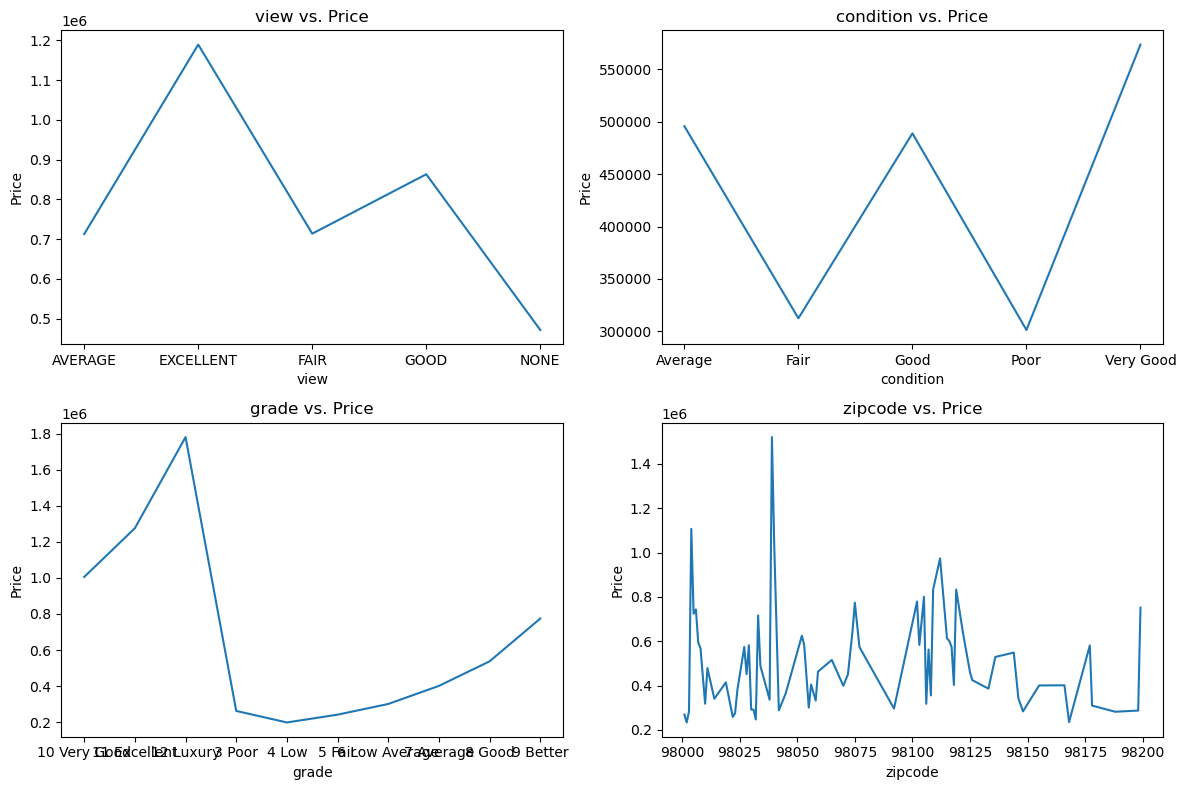

In [54]:
categorical_vars = data[['view', 'condition', 'grade', 'zipcode']]
y = data['price']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2

    ax = axes[row][col]
    grouped_data = data.groupby(var)['price'].mean()
    ax.plot(grouped_data.index, grouped_data.values)
    ax.set_xlabel(var)
    ax.set_ylabel('Price')
    ax.set_title(f'{var} vs. Price')

plt.tight_layout()
plt.show()

Observation: 
* View - Houses with excellent view are highest priced. Houses without view have lowest price
* Condition - As expected, houses in very good condition attract highest price while poor condition attract lowest price
* Grade - Grade seems like a similar measure to condition, hence will not use it in the modelling
* zipcode - Price varies significantly with zip code. Though we will need to categorize the zipcodes to high, medium and low price inorder to use encode this column for modelling

In [55]:
#zipcode analysis
zip_average_price = data.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zip_average_price

zipcode
98039    1.520926e+06
98004    1.107002e+06
98040    1.033614e+06
98112    9.738298e+05
98109    8.339479e+05
             ...     
98001    2.698085e+05
98022    2.585777e+05
98032    2.475114e+05
98168    2.356904e+05
98002    2.339996e+05
Name: price, Length: 70, dtype: float64

In [56]:
zipcode_counts = data['zipcode'].value_counts()
print(zipcode_counts)

zipcode
98103    600
98115    577
98117    550
98052    520
98034    517
        ... 
98077     47
98014     43
98070     30
98024     27
98039     27
Name: count, Length: 70, dtype: int64


In [57]:
# zip code medians and rankings 

# apply the median home price per zip code to the data frame 
data['median_zip'] = data['zipcode'].apply(lambda x: round(data.loc[data['zipcode']==x]['price'].median(), 0))

# group dataframe by zipcode on median price, sorted ascending - to enable binning
zipsorted = pd.DataFrame(data.groupby('zipcode')['price'].median().sort_values(ascending=True))

# divide dataframe into groups and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1


# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    '''Takes in a line, a lookup table, and a target column
    returns value of target column
    ARGUMENTS:
    line from dataframe x
    lookup table frame
    column to return rank'''
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]


# make a new column. Look up each zip entry's group, and append to the column.
data['zip_rank'] = data['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

# apply the median home price per zip code to data frame
data['median_zip'] = data['zipcode'].apply(lambda x: round(data.loc[data['zipcode']==x]['price'].median(), 0))


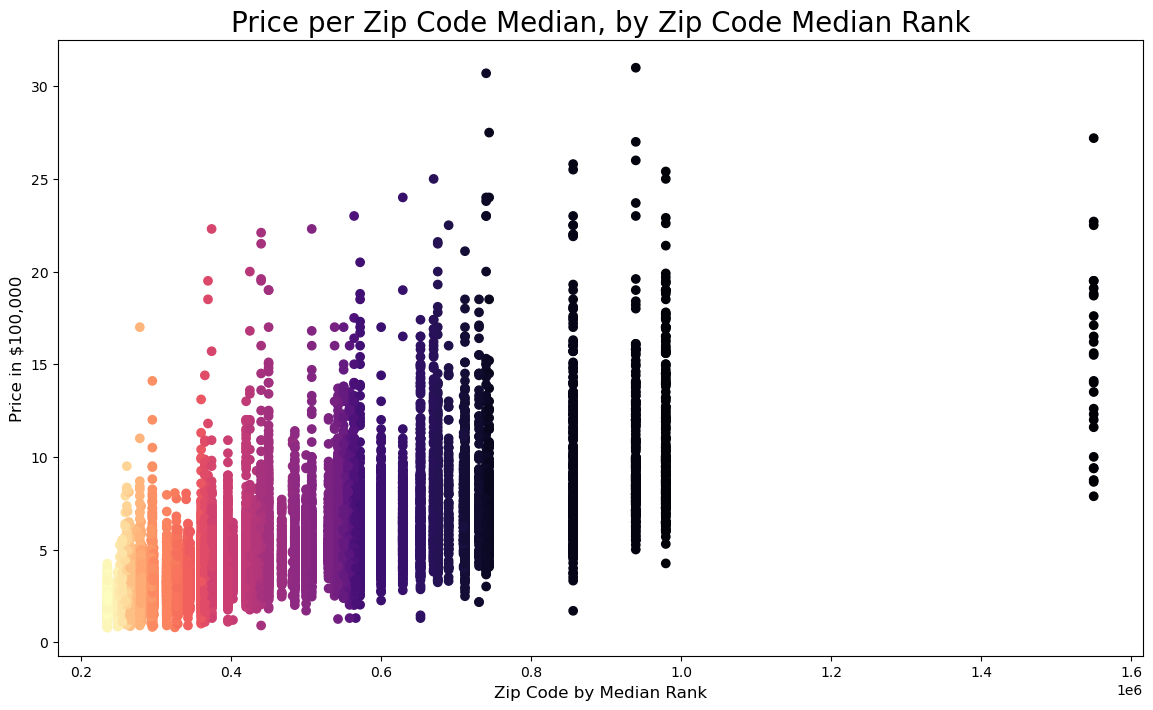

In [58]:
# visualize zip code using the median zipcode 

fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(data['median_zip'], data['price'] /100000, c=data['zip_rank'], cmap='magma_r')

ax.set_xlabel('Zip Code by Median Rank', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Zip Code Median, by Zip Code Median Rank', fontsize=20);

# save visualization to png
plt.savefig("Price per zipcode_1.png")

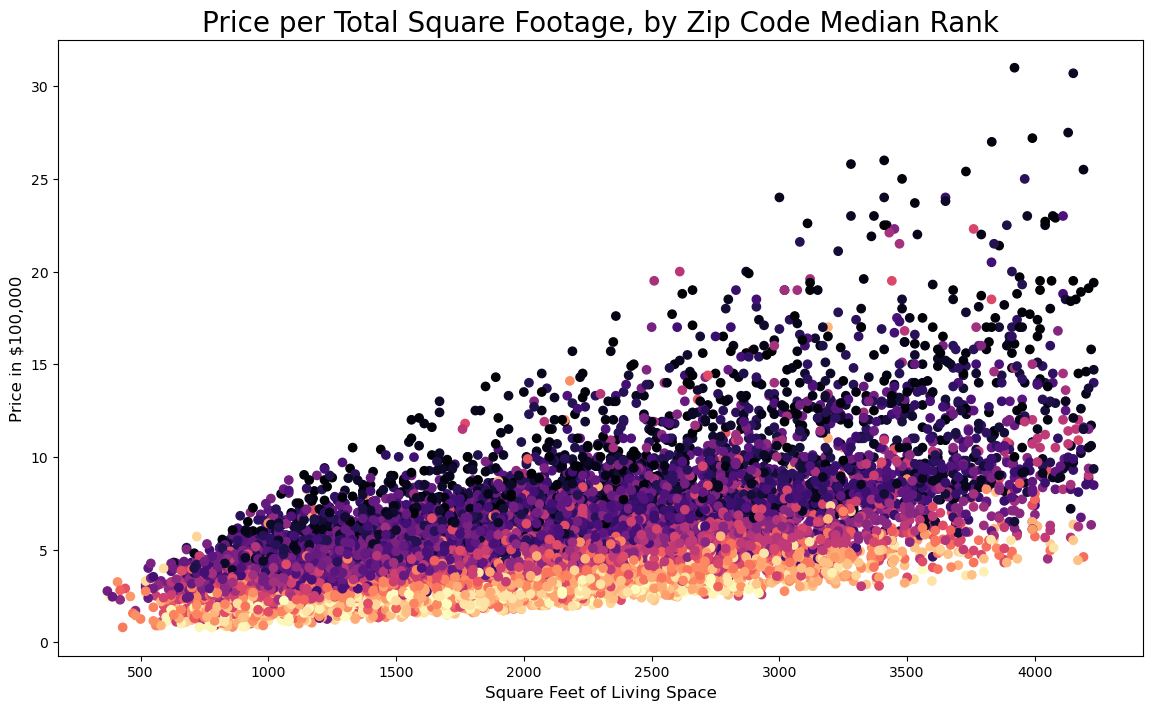

In [59]:
# visualize zip code as a color function, on a plot of price per square footage

fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(data['sqft_living'], data['price'] /100000, c=data['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Footage, by Zip Code Median Rank', fontsize=20)
;
plt.savefig("Price per zipcode_2.png")

Observation:
* When zip codes were grouped by median price and ranked, they show a strong correlation with price.

In [60]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
median_zip       0
zip_rank         0
dtype: int64

In [61]:
#reviewing unique values for categorical variables

columns = ['waterfront', 'view', 'condition', 'grade']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'waterfront':
[0 1]

Unique values for column 'view':
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

Unique values for column 'condition':
['Average' 'Very Good' 'Good' 'Fair' 'Poor']

Unique values for column 'grade':
['7 Average' '6 Low Average' '8 Good' '9 Better' '10 Very Good' '5 Fair'
 '4 Low' '11 Excellent' '3 Poor' '12 Luxury']



In [62]:
# Applying ordinal encoding to categorical variables

from sklearn.preprocessing import OrdinalEncoder

# categories for each variable
view_categories = ['NONE', 'AVERAGE', 'FAIR' , 'GOOD', 'EXCELLENT']
condition_categories = ['Poor', 'Fair', 'Good', 'Average', 'Very Good']
grade_categories = ['3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury']

# instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[view_categories, condition_categories, grade_categories]) 

# Fit and transform the categorical variables
encoded_data = encoder.fit_transform(data[['view', 'condition','grade']])

# Add the encoded columns to the original DataFrame
data_encoded = data.copy()
data_encoded[['view', 'condition', 'grade']] = encoded_data

# Print the updated DataFrame
print(data_encoded)

               id        date     price  bedrooms  bathrooms  sqft_living   
0      7129300520  10/13/2014  221900.0         3       1.00       1180.0  \
1      6414100192   12/9/2014  538000.0         3       2.25       2570.0   
2      5631500400   2/25/2015  180000.0         2       1.00        770.0   
3      2487200875   12/9/2014  604000.0         4       3.00       1960.0   
4      1954400510   2/18/2015  510000.0         3       2.00       1680.0   
...           ...         ...       ...       ...        ...          ...   
18856   263000018   5/21/2014  360000.0         3       2.50       1530.0   
18857  6600060120   2/23/2015  400000.0         4       2.50       2310.0   
18858  1523300141   6/23/2014  402101.0         2       0.75       1020.0   
18859   291310100   1/16/2015  400000.0         3       2.50       1600.0   
18860  1523300157  10/15/2014  325000.0         2       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built   


In [63]:
data_encoded.head()

id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00       1180.0  \
1  6414100192   12/9/2014  538000.0         3       2.25       2570.0   
2  5631500400   2/25/2015  180000.0         2       1.00        770.0   
3  2487200875   12/9/2014  604000.0         4       3.00       1960.0   
4  1954400510   2/18/2015  510000.0         3       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built   
0    5650.0     1.0           0   0.0  ...            0.0      1955  \
1    7242.0     2.0           0   0.0  ...          400.0      1951   
2   10000.0     1.0           0   0.0  ...            0.0      1933   
3    5000.0     1.0           0   0.0  ...          910.0      1965   
4    8080.0     1.0           0   0.0  ...            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   
0           0.0    98178  47.5112 -122.257           1340        5650  \
1        1991.0    98125  47.7210 -122.319           1690        7639   
2            0.    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   median_zip  zip_rank  
0    278277.0        12  
1    425000.0        35  
2    434000.0        36  
3    484950.0        42  
4    628900.0        57  

[5 rows x 23 columns]

In [64]:
# drop columns we will not be using in readiness for modelling
columns_to_drop = ['date', 'yr_built', 'yr_renovated', 'waterfront']
data_encoded = data_encoded.drop(columns_to_drop, axis=1)

In [65]:
data_encoded.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0  7129300520  221900.0         3       1.00       1180.0    5650.0     1.0  \
1  6414100192  538000.0         3       2.25       2570.0    7242.0     2.0   
2  5631500400  180000.0         2       1.00        770.0   10000.0     1.0   
3  2487200875  604000.0         4       3.00       1960.0    5000.0     1.0   
4  1954400510  510000.0         3       2.00       1680.0    8080.0     1.0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat   
0   0.0        3.0    4.0        1180            0.0    98178  47.5112  \
1   0.0        3.0    4.0        2170          400.0    98125  47.7210   
2   0.0        3.0    3.0         770            0.0    98028  47.7379   
3   0.0        4.0    4.0        1050          910.0    98136  47.5208   
4   0.0        3.0    5.0        1680            0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  median_zip  zip_rank  
0 -122.257           1340        5650    278277.0        12  
1 -122.319           1690        7639    425000.0        35  
2 -122.233           2720        8062    434000.0        36  
3 -122.393           1360        5000    484950.0        42  
4 -122.045           1800        7503    628900.0        57

<Axes: xlabel='bathrooms', ylabel='price'>

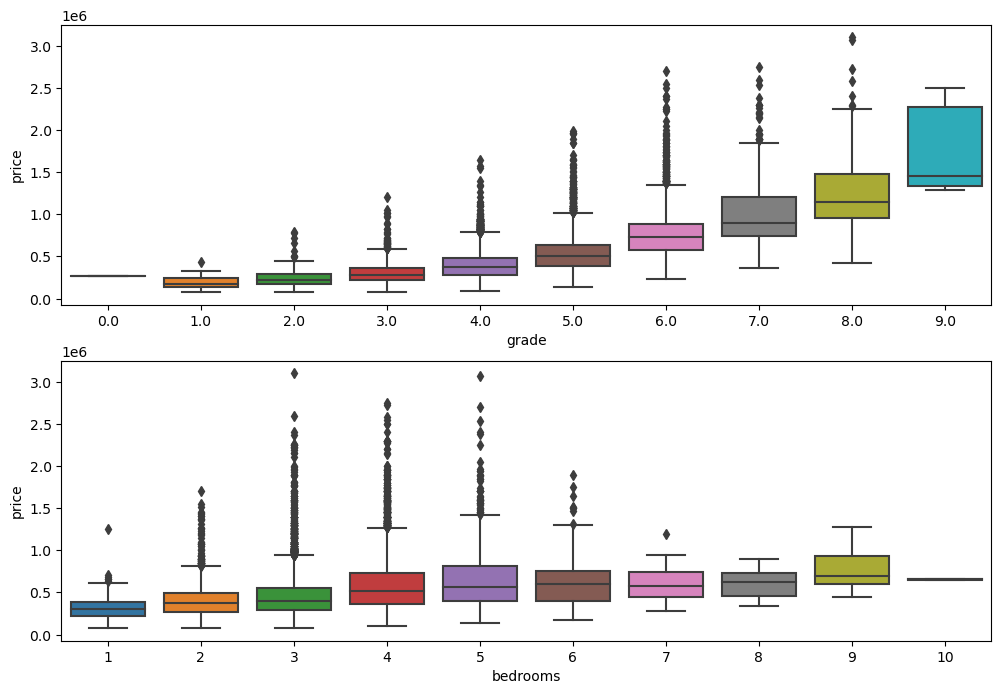

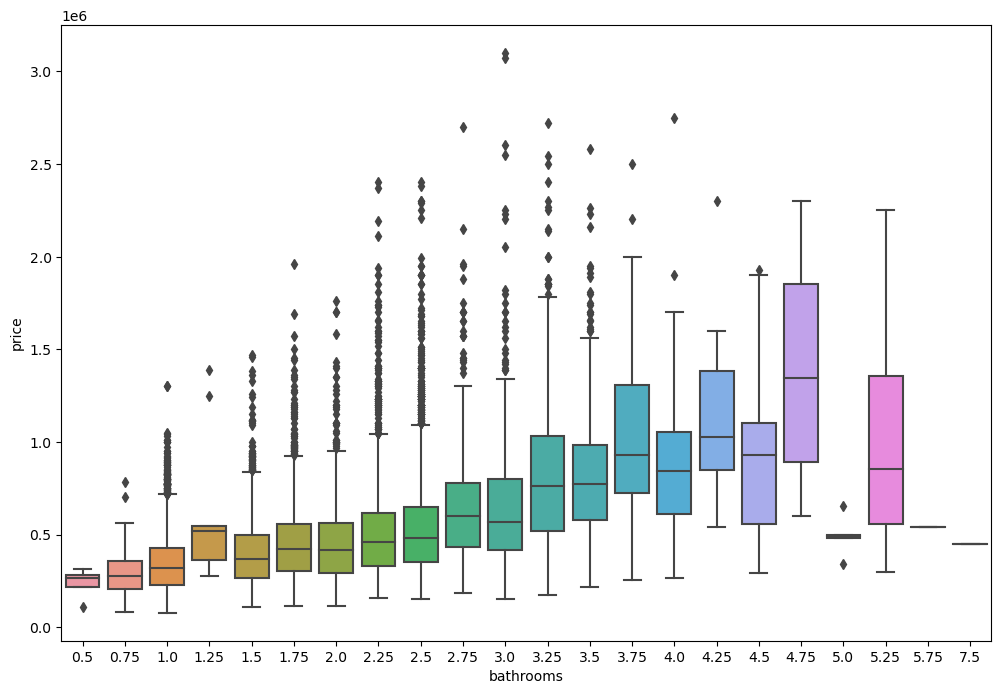

In [66]:
# Relationship between ordinal variables & price

fig,ax=plt.subplots(2,1,figsize=(12,8))
sns.boxplot(x=data_encoded['grade'],y=data_encoded['price'],ax=ax[0])
sns.boxplot(x=data_encoded['bedrooms'],y=data_encoded['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(12,8))
sns.boxplot(x=data_encoded['bathrooms'],y=data_encoded['price'])

<Axes: xlabel='bathrooms', ylabel='price'>

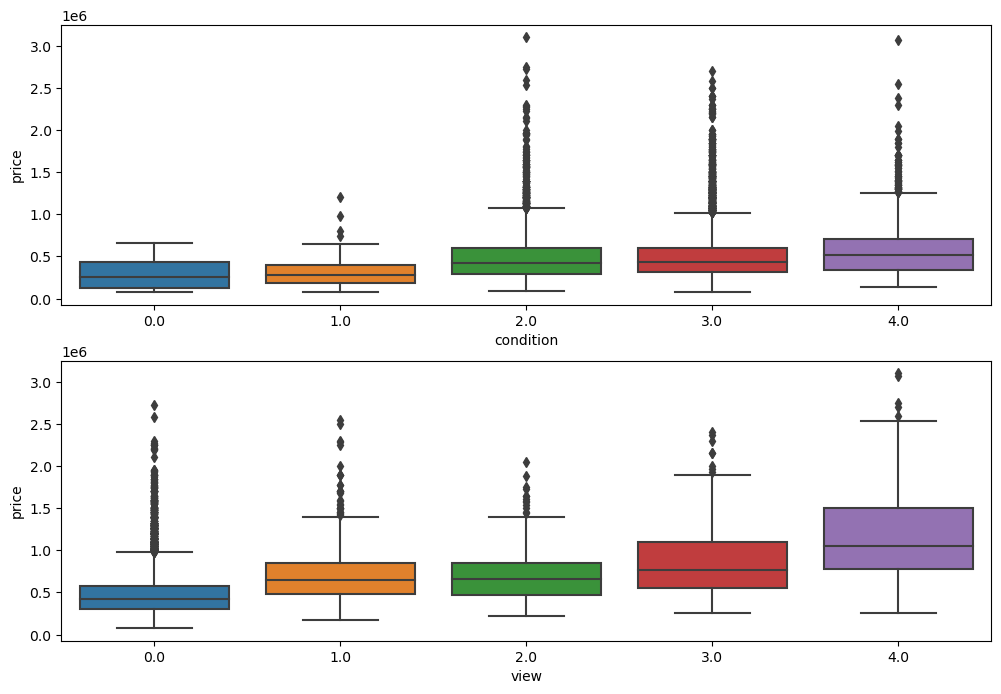

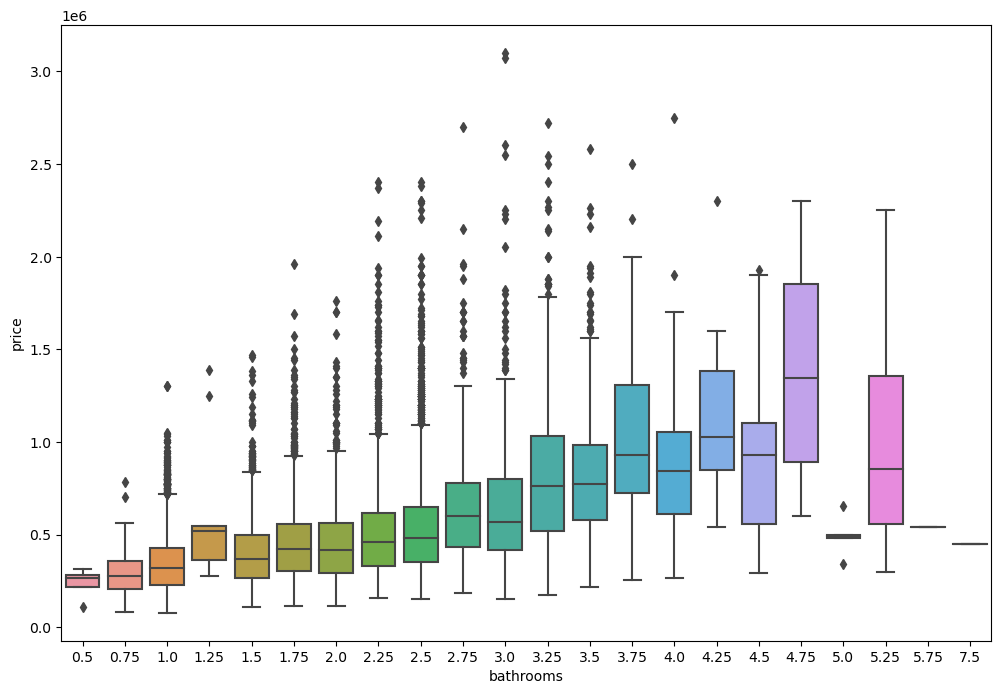

In [67]:
# Relationship between ordinal variables & price

fig,ax=plt.subplots(2,1,figsize=(12,8))
sns.boxplot(x=data_encoded['condition'],y=data_encoded['price'],ax=ax[0])
sns.boxplot(x=data_encoded['view'],y=data_encoded['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(12,8))
sns.boxplot(x=data_encoded['bathrooms'],y=data_encoded['price'])

Boxplots observations:
* Grade - As the grade increases, the price of the house increases, hence a great predictor variable.
* Bedrooms - As the bedrooms increase from 1-5 b/rooms, there is a minimal increase in price. From 6-9 b/rooms.. the price of houses starts to fall. At 10 bedrooms, the price again rises but almost equivalent to the impact of a 5 b/roomed house. This shows that the variable has a negative impact on past past five bedrooms. Also, the marginal increases show that bedrooms are not a good predictor of price.
* View - Increases house price as view increases but we noticed a view of 1 & 2 have the same contribution to price increase.
* Bathrooms - upto 4.75 bathrooms, there is consistent increase in price. Past 4.75 bathrooms, there is a negative influence on price.
* Condition - Very minimal influence on price - hence will not use this variable.

## 6.0 Modelling

##### Validating correlation & multicolliniarity

In [68]:
data_encoded.corr()["price"].sort_values()

zipcode         -0.007215
long            -0.004873
id               0.005622
sqft_lot15       0.045048
sqft_lot         0.061911
condition        0.074441
floors           0.253928
sqft_basement    0.265612
bedrooms         0.282895
view             0.360496
lat              0.382805
bathrooms        0.443030
sqft_above       0.508767
sqft_living15    0.554034
sqft_living      0.621942
grade            0.631748
zip_rank         0.655906
median_zip       0.694356
price            1.000000
Name: price, dtype: float64

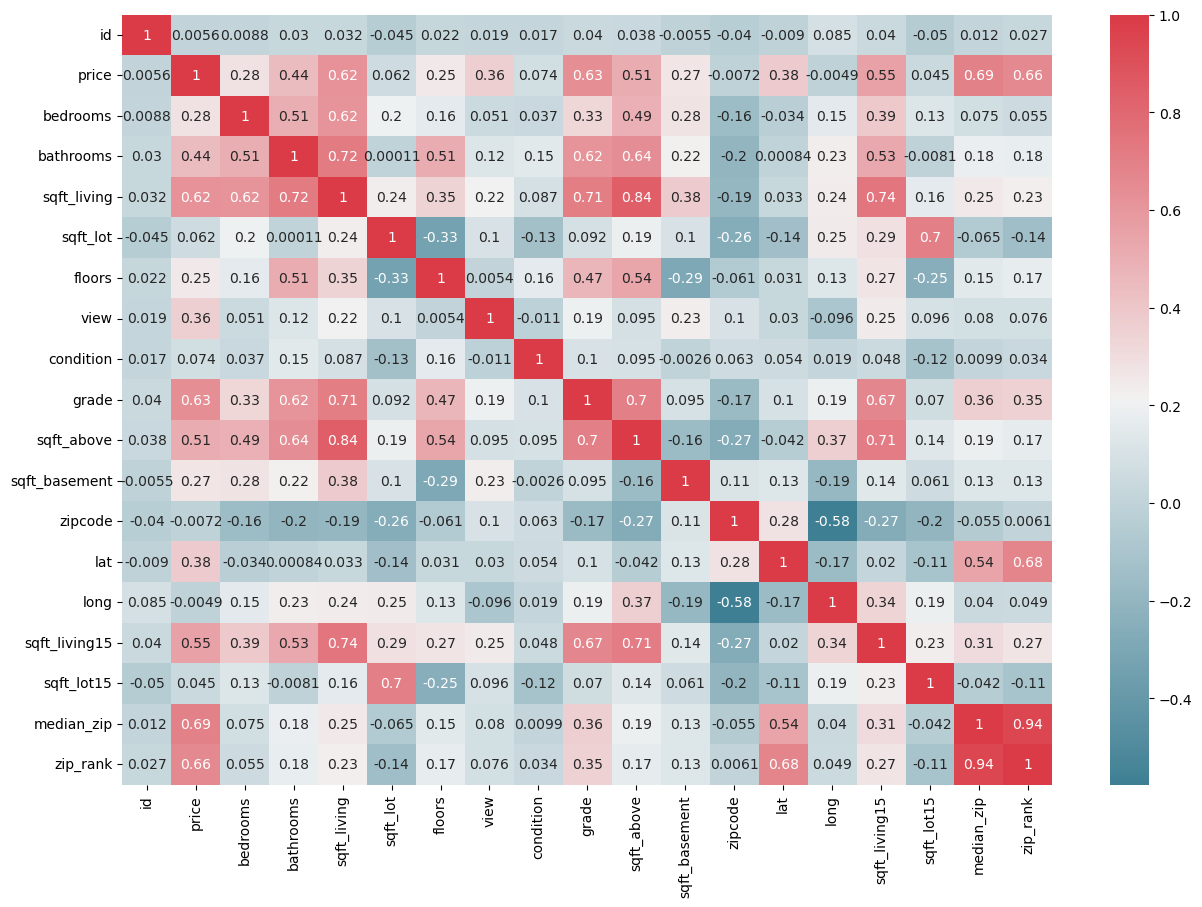

In [69]:
# Heatmap
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data_encoded.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data_encoded)

Observations:
* From the correlation,heatmap and above analysis we prioritize the below variables to build our prediction models due to their highest correlation with price, while avoiding those with weaker correlation and that have strong multicollinearity:
* sqft_living, grade, sqft_living15, bathrooms, lat.
*  While Zip_rank & median_zip have high correlation, we will not use this dummy variables as they were derived with the help of the target variable.

#### Model 1 - Simple Linear Regression


##### 'sqft_living' has the highest correlation with price. We will build a simple linear regression model as a starter.

In [70]:
#model_1 
y = data_encoded["price"]
X_model_1 = data_encoded[["sqft_living"]]

In [71]:
model_1 = sm.OLS(y, sm.add_constant(X_model_1))
model_1_results = model_1.fit()

print(model_1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:53:17   Log-Likelihood:            -2.5814e+05
No. Observations:               18845   AIC:                         5.163e+05
Df Residuals:                   18843   BIC:                         5.163e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.094e+04   4396.324     11.586      

Interpretation and Observations:
The model is statistically significant overall, with an F-statistic p-value well below 0.05
The model explains about 38% of the variance in price
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
Per the model - If the house had 0 sqft, we would expect price of $50940.
* With this finding, we will create a extra simple LR models from the other numerical variables

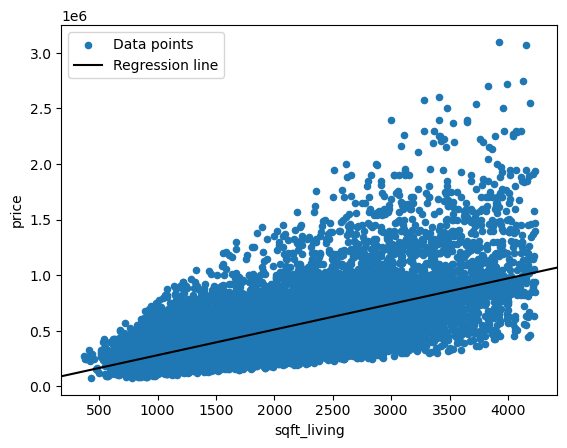

In [72]:
# Scatterplot & regression line for model_1
fig, ax = plt.subplots()
data_encoded.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=model_1_results, label="Regression line", ax=ax, color="black")
ax.legend();

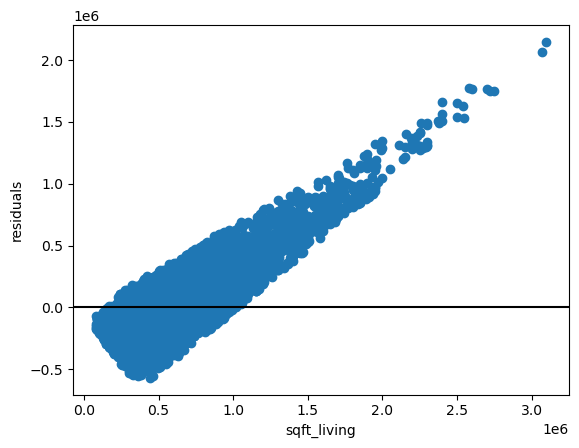

In [73]:
# model_1 residuals
fig, ax = plt.subplots()

ax.scatter(data_encoded["price"], model_1_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

Does not pass the assumptions for a linear model

In [74]:
#model_2
y = data_encoded["price"]
X_model_2 = data_encoded[["bathrooms"]]

In [75]:
model_2 = sm.OLS(y, sm.add_constant(X_model_2))
model_2_results = model_2.fit()

print(model_2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     4602.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:53:23   Log-Likelihood:            -2.6069e+05
No. Observations:               18845   AIC:                         5.214e+05
Df Residuals:                   18843   BIC:                         5.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.491e+05   5457.460     27.327      0.0

Interpretation: 
* Model is significant. Bathrooms explain price by 19.6%
* Next step - create more simple linear regression models 

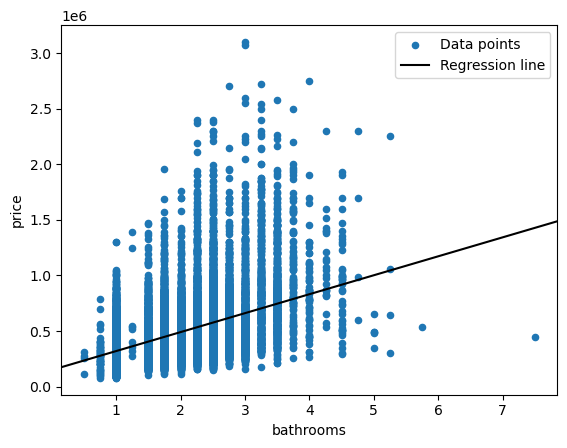

In [76]:
# Scatterplot & regression line for model_2
fig, ax = plt.subplots()
data_encoded.plot.scatter(x="bathrooms", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=model_2_results, label="Regression line", ax=ax, color="black")
ax.legend();

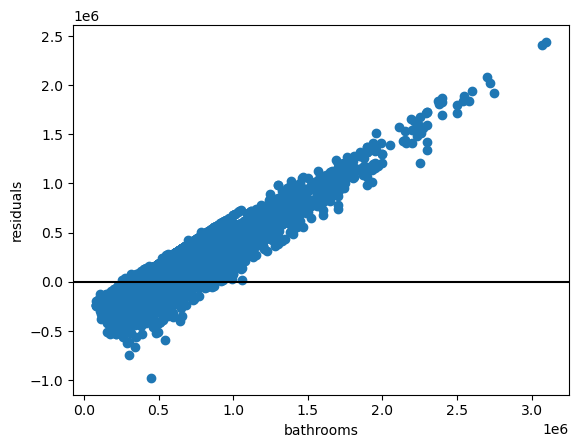

In [77]:
# model_2 residuals
fig, ax = plt.subplots()

ax.scatter(data_encoded["price"], model_2_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("bathrooms")
ax.set_ylabel("residuals");

### Multilinear regression

In [78]:
#model_3
y = data_encoded["price"]
X_model_3 = data_encoded[["sqft_living", "bathrooms", "sqft_above", "sqft_living15", 'bedrooms']]

In [79]:
model_3 = sm.OLS(y, sm.add_constant(X_model_3))
model_3_results = model_3.fit()

print(model_3_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2765.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:53:29   Log-Likelihood:            -2.5756e+05
No. Observations:               18845   AIC:                         5.151e+05
Df Residuals:                   18839   BIC:                         5.152e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.151e+04   6987.195     10.234

Observation:

* including 5 numerical variables in model_5 gave us R-squared of ~ 42% which is a minor improvement from model_1 which had sqft_living variable only.
* Model_3 has a high condition number showing strong multicolliniarity in numeric variables
* However, in the next model, we will mix numeric and categorical variables.
* sqft_above and bedrooms produced negative coefficients

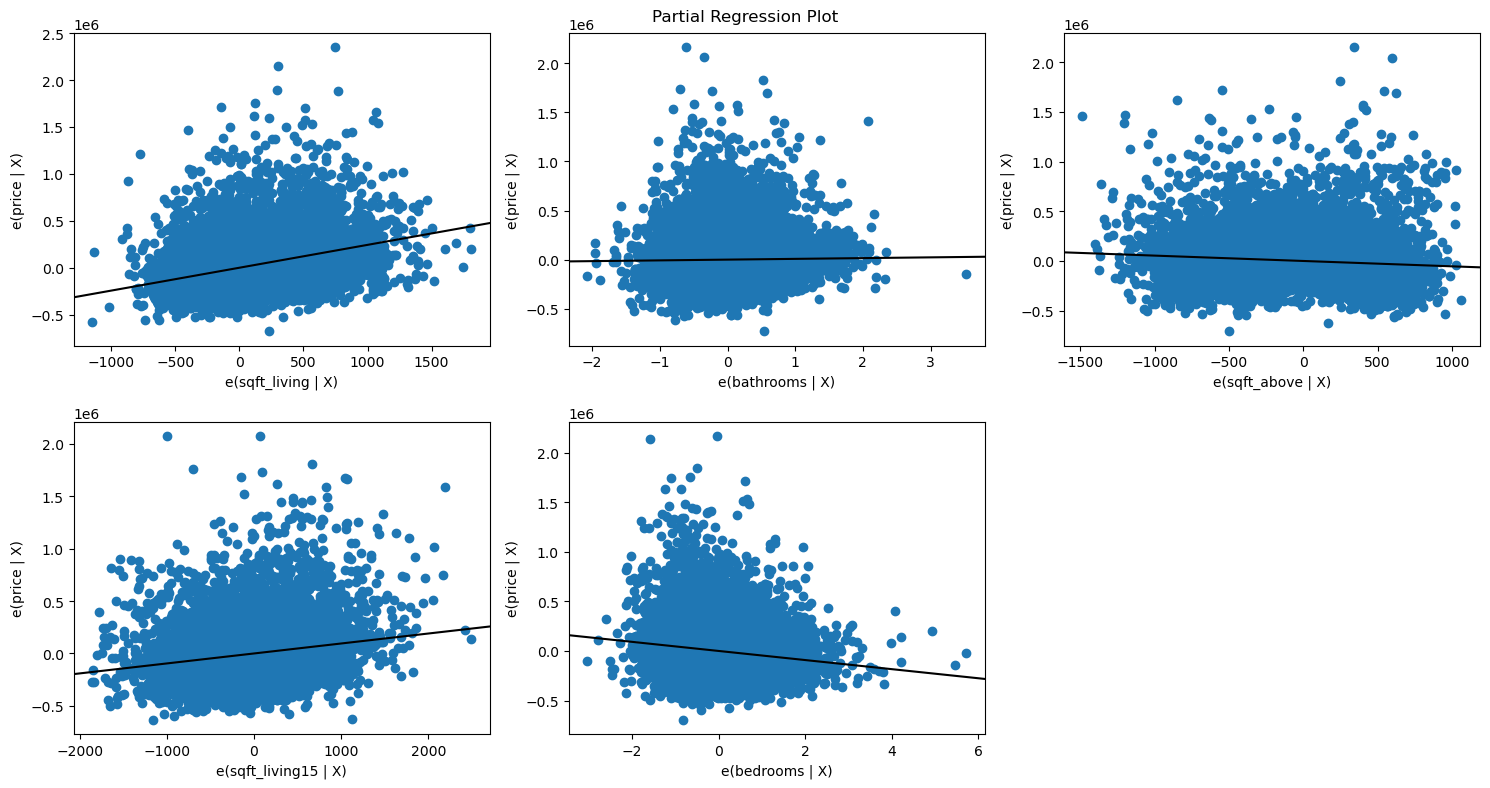

In [80]:
# visualization for model_3
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    model_3_results,
    exog_idx=list(X_model_3.columns.values),
    grid=(2,3),
    fig=fig)
plt.show()

In [81]:
#model_4 - Modelling for all variables with significant correlation with price
y = data_encoded["price"]
X_model_4 = data_encoded[["sqft_living", "bathrooms", "sqft_living15",'bedrooms', 'lat','floors', 'sqft_lot', 'view','grade']]

In [82]:
model_4 = sm.OLS(y, sm.add_constant(X_model_4))
model_4_results = model_4.fit()

print(model_4_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3472.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:53:36   Log-Likelihood:            -2.5353e+05
No. Observations:               18845   AIC:                         5.071e+05
Df Residuals:                   18835   BIC:                         5.072e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.109e+07   4.38e+05    -71.069

Observation:
* In model_4 we added categorical variables to to the numerical variables and this has increased R-squared to 62%
* In the first iteration of model_4, we've stablished that sqft_above, sqft_basement, and condition variables have p-values above 0.05, indicating that their coefficients are not statistically significant. Hence I made the decision to drop them from the final model_4 as shown above.
* Important: As the variables are on different scales, the coeffients are not interpretable as some are too large or too small against general expectation. in the next model, we will scale all the predictor variables.

### Scaling the features

In [83]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

In [84]:
# Now we'll apply it to our data by using the .fit() and .transform() methods.
ss.fit(X_model_4)

X_scaled = ss.transform(X_model_4)

In [86]:
from sklearn.linear_model import LinearRegression

# fit a LinearRegression object to our training data!
lr = LinearRegression()
lr.fit(X_scaled, y)

LinearRegression()

In [87]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([103300.57516554, -11052.17968905,  22215.04833433, -10988.05021738,
        89082.8381894 , -11809.7450286 , -16728.09681142,  56165.33852413,
        83155.89031241])

In [88]:
lr.intercept_

498764.2999204037

In [89]:
lr.score(X_scaled, y)

0.6239334607478044

In [90]:
y_hat = lr.predict(X_scaled)
y_hat

array([320272.11952817, 615009.24826849, 373121.85623772, ...,
       355164.67508482, 447597.04671214, 356248.87277798])

#### Evaluate model performance

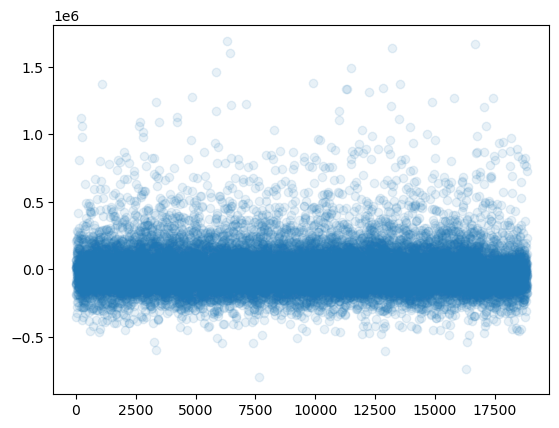

In [91]:
# Observing Residuals
y_hat = lr.predict(X_scaled)
resid = (y - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

Residuals interpretation:
* The errors are centered around zero and mostly appear to be scattered in similar pattern. This shows that there is no systematic error in the model and that the linear regression assumptions of error independence, normal distribution & homoscedasticity have been present in the model.

### Best fit line for final model

###  y = 498764.3  +  103300.58 X sqft_living  -  11052.18 X bathrooms  +  22215.05 X sqft_living15  -  10988.05 X bedrooms  +  89082.83 X lat  -  11809.75 X floors  -  16728.09 X sqft_lot  +  56165.34 X view  +  83155.89 X grade

## 7.0 Linear regression findings

1. Through correlation, heatmap and various visualizations and analysis, we identified the variables with which to build our prediction models due to their highest correlation with price, while dropping variables with weaker correlation and that have strong multicollinearity with other variables. 
2. Predictor variables chosen for modelling include: 'sqft_living', 'bathrooms', 'sqft_living15','bedrooms', 'lat','floors', 'sqft_lot', 'view','grade'.
3. During exploratory data analysis, we created zip-code dummy variables to understand the impact of zipcode on house prices. The visualization showed that there is a strong correlation between zipcode and price. Driven by limited time, I was not able to feature engineer the zipcodes for use in our modelling. However, we included 'lat'as a representation of county area.
4. We build various models and demostrated that addition of more variables was increasing ability to predict housing prices.
5. Our final model (scaled) is statistically significant overall, with an F-statistic p-value below 0.05 The model can explain 62.39% of the variance in house price. This shows that there are other factors that that influence house prices.
6. From our final model, we see that the equation of our best fitted line is as below:


y = 498764.3 + 103300.58 X sqft_living - 11052.18 X bathrooms + 22215.05 X sqft_living15 - 10988.05 X bedrooms +  89082.83 X lat - 11809.75 X floors - 16728.09 X sqft_lot + 56165.34 X view + 83155.89 X grade




## 8.0 Recommendations

* This project built simple and multilinear regression models that could predict 62.39% of house prices. Iterating over the models showed that house prices depend on several factors.
* The top features that influence house prices include: sqft_living, latitude, grade and view.
* Due to strong correlation of zipcode and price, I recommend future modelling that includes zipcode locations. In future analysis I would consider adding and analyzing data such school ratings, mortgage rates, crime and environment quality that could have an effect on the house prices.